In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hrt = pd.read_csv('heart.csv')
hrt.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA        140          289          0     Normal   
1  49.0   F           NAP        160          180          0     Normal   
2  37.0   M           ATA        130          283          0         ST   
3  48.0   F           ASY        138          214          0     Normal   
4  54.0   M           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [3]:
hrt.shape

(918, 12)

In [ ]:
hrt.info()

In [4]:
hrt.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  914.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.553611  132.396514   198.799564    0.233115  136.809368   
std      9.424972   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
hrt.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
#Checking null values
hrt.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#Filling null values in Age column with average age
hrt['Age'].fillna(np.mean(hrt['Age']), inplace = True)

In [8]:
#Filling null values in Sex column with mode
hrt['Sex'].value_counts()

M    723
F    192
Name: Sex, dtype: int64

In [9]:
hrt['Sex'].fillna('M', inplace = True)

In [10]:
hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Exploratory Data Analysis

In [11]:
gender = hrt.Sex.value_counts()
gender

M    726
F    192
Name: Sex, dtype: int64

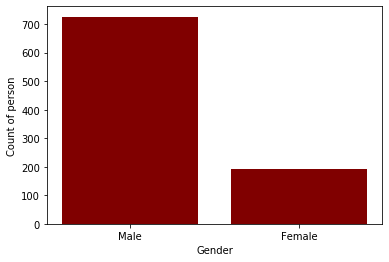

In [13]:
plt.bar(['Male','Female'], gender.values, color = 'Maroon')
plt.xlabel("Gender")
plt.ylabel('Count of person')
plt.show()

In [15]:
cp = hrt.ChestPainType.value_counts()
cp

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

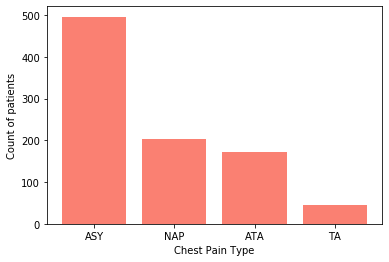

In [18]:
plt.bar(cp.index, cp.values, color='Salmon')
plt.xlabel("Chest Pain Type")
plt.ylabel('Count of patients')
plt.show()

In [21]:
#Heart disease distribution
hd = hrt.HeartDisease.value_counts()
hd

1    508
0    410
Name: HeartDisease, dtype: int64

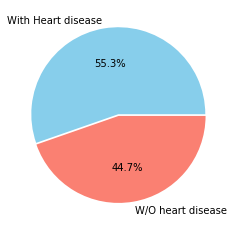

In [29]:
plt.pie(hd.values, labels=["With Heart disease", "W/O heart disease"], autopct = "%0.1f%%",
       explode=[0.01,0.01], colors=['SkyBlue','Salmon'])
plt.show()

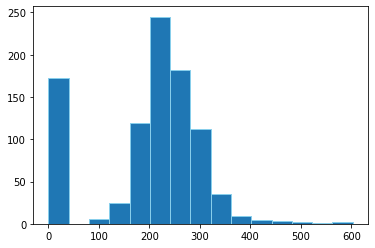

In [32]:
#Distribution of Cholesterol
plt.hist(hrt['Cholesterol'], bins=15, edgecolor = 'Skyblue')
plt.show()

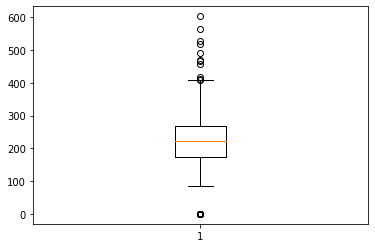

In [39]:
plt.boxplot(hrt['Cholesterol'])
plt.show()

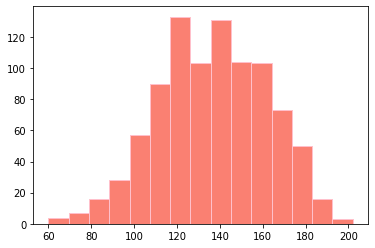

In [34]:
#Distribution of Heart rate
plt.hist(hrt.MaxHR, bins=15, color = 'Salmon', edgecolor = 'Pink')
plt.show()

In [35]:
plt.scatter(hrt['ChestPainType'], hrt['Age'])
plt.show()

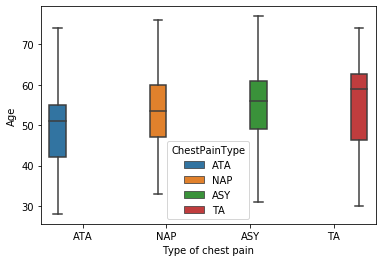

In [37]:
sns.boxplot(x = 'ChestPainType', y='Age', data=hrt, hue = 'ChestPainType')
plt.xlabel('Type of chest pain')
plt.ylabel('Age')
plt.show()

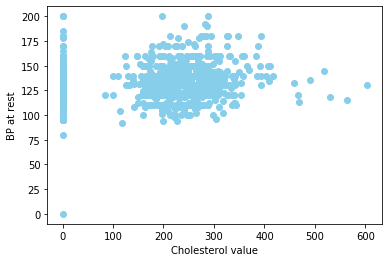

In [41]:
plt.scatter(hrt.Cholesterol, hrt.RestingBP, color = 'SkyBlue')
plt.xlabel('Cholesterol value')
plt.ylabel('BP at rest')
plt.show()

The graph shows that their is no conclusive evidence stating BP changes due to Cholesterol

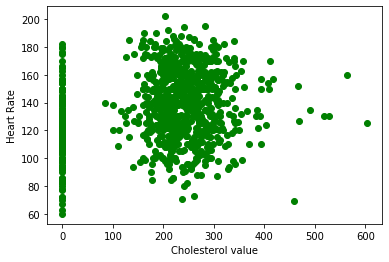

In [42]:
plt.scatter(hrt.Cholesterol, hrt.MaxHR, color = 'Green')
plt.xlabel('Cholesterol value')
plt.ylabel('Heart Rate')
plt.show()

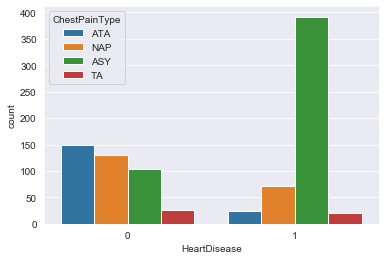

In [43]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ChestPainType', data = hrt)
plt.show()

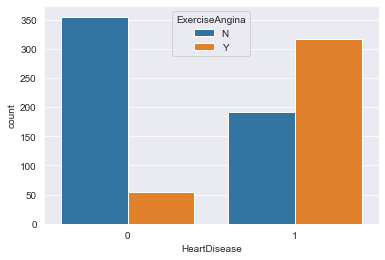

In [45]:
sns.set_style('darkgrid')
sns.countplot(x = 'HeartDisease',hue = 'ExerciseAngina', data = hrt)
plt.show()